In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(111)
var = ['X', 'Y']
labels = ['점0','점1','점2','점3','점4']
X = np.random.random_sample([5, 2]) * 10
df = pd.DataFrame(X, columns=var, index=labels)
print(df)

           X         Y
점0  6.121702  1.690698
점1  4.360590  7.692625
점2  2.953253  1.491630
점3  0.224783  4.202245
점4  2.386821  3.376562


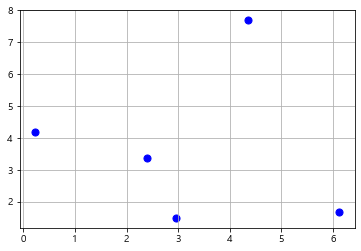

In [3]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', s=50)
plt.grid(True)
plt.show()

In [4]:
from scipy.spatial.distance import pdist, squareform
distmatrix = pdist(df, metric='euclidean') # 두 점 사이의 거리 계산
row_dist = pd.DataFrame(squareform(distmatrix), columns=labels, index=labels)
print(row_dist) # 두점 사이 거리 계산값 출력

          점0        점1        점2        점3        점4
점0  0.000000  6.254970  3.174696  6.409487  4.097740
점1  6.254970  0.000000  6.358690  5.411807  4.745963
점2  3.174696  6.358690  0.000000  3.846035  1.968201
점3  6.409487  5.411807  3.846035  0.000000  2.314338
점4  4.097740  4.745963  1.968201  2.314338  0.000000


In [5]:
from scipy.cluster.hierarchy import linkage # linkage() : 응집형 계층적 클러스터링 수행
row_clusters = linkage(distmatrix, method='complete')
row_clusters


array([[2.        , 4.        , 1.96820089, 2.        ],
       [3.        , 5.        , 3.84603471, 3.        ],
       [0.        , 1.        , 6.25496953, 2.        ],
       [6.        , 7.        , 6.40948658, 5.        ]])

In [6]:
pd.DataFrame(row_clusters, columns=['클러스터ID_1', '클러스터ID_2', '거리', '클러스터 멤버수'],
 index=['클러스터 %d' % (i+1) for i in range(row_clusters.shape[0])])


,클러스터ID_1,클러스터ID_2,거리,클러스터 멤버수
클러스터 1,2.0,4.0,1.968201,2.0
클러스터 2,3.0,5.0,3.846035,3.0
클러스터 3,0.0,1.0,6.254970,2.0
클러스터 4,6.0,7.0,6.409487,5.0


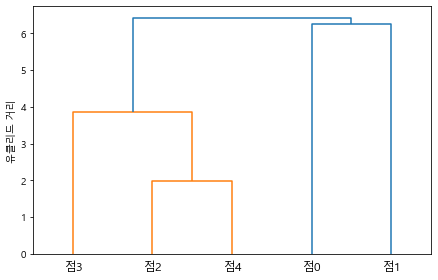

In [7]:
from scipy.cluster.hierarchy import dendrogram # dendrogram() : 클러스터의 계층 구조를 표현
row_dendrogram = dendrogram(row_clusters, labels=labels)
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.tight_layout()
plt.ylabel('유클리드 거리')
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
# n_clusters : 최종 클러스터 개수
# linkage = ward complete averagd single
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = ac.fit_predict(X)
print('클러스터 분류 결과 :', labels)

클러스터 분류 결과 : [0 1 0 0 0]


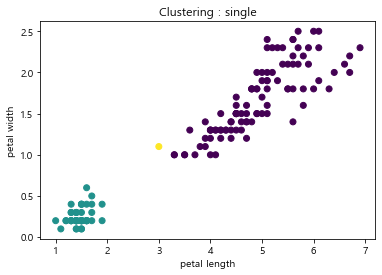

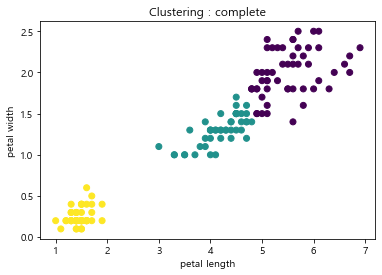

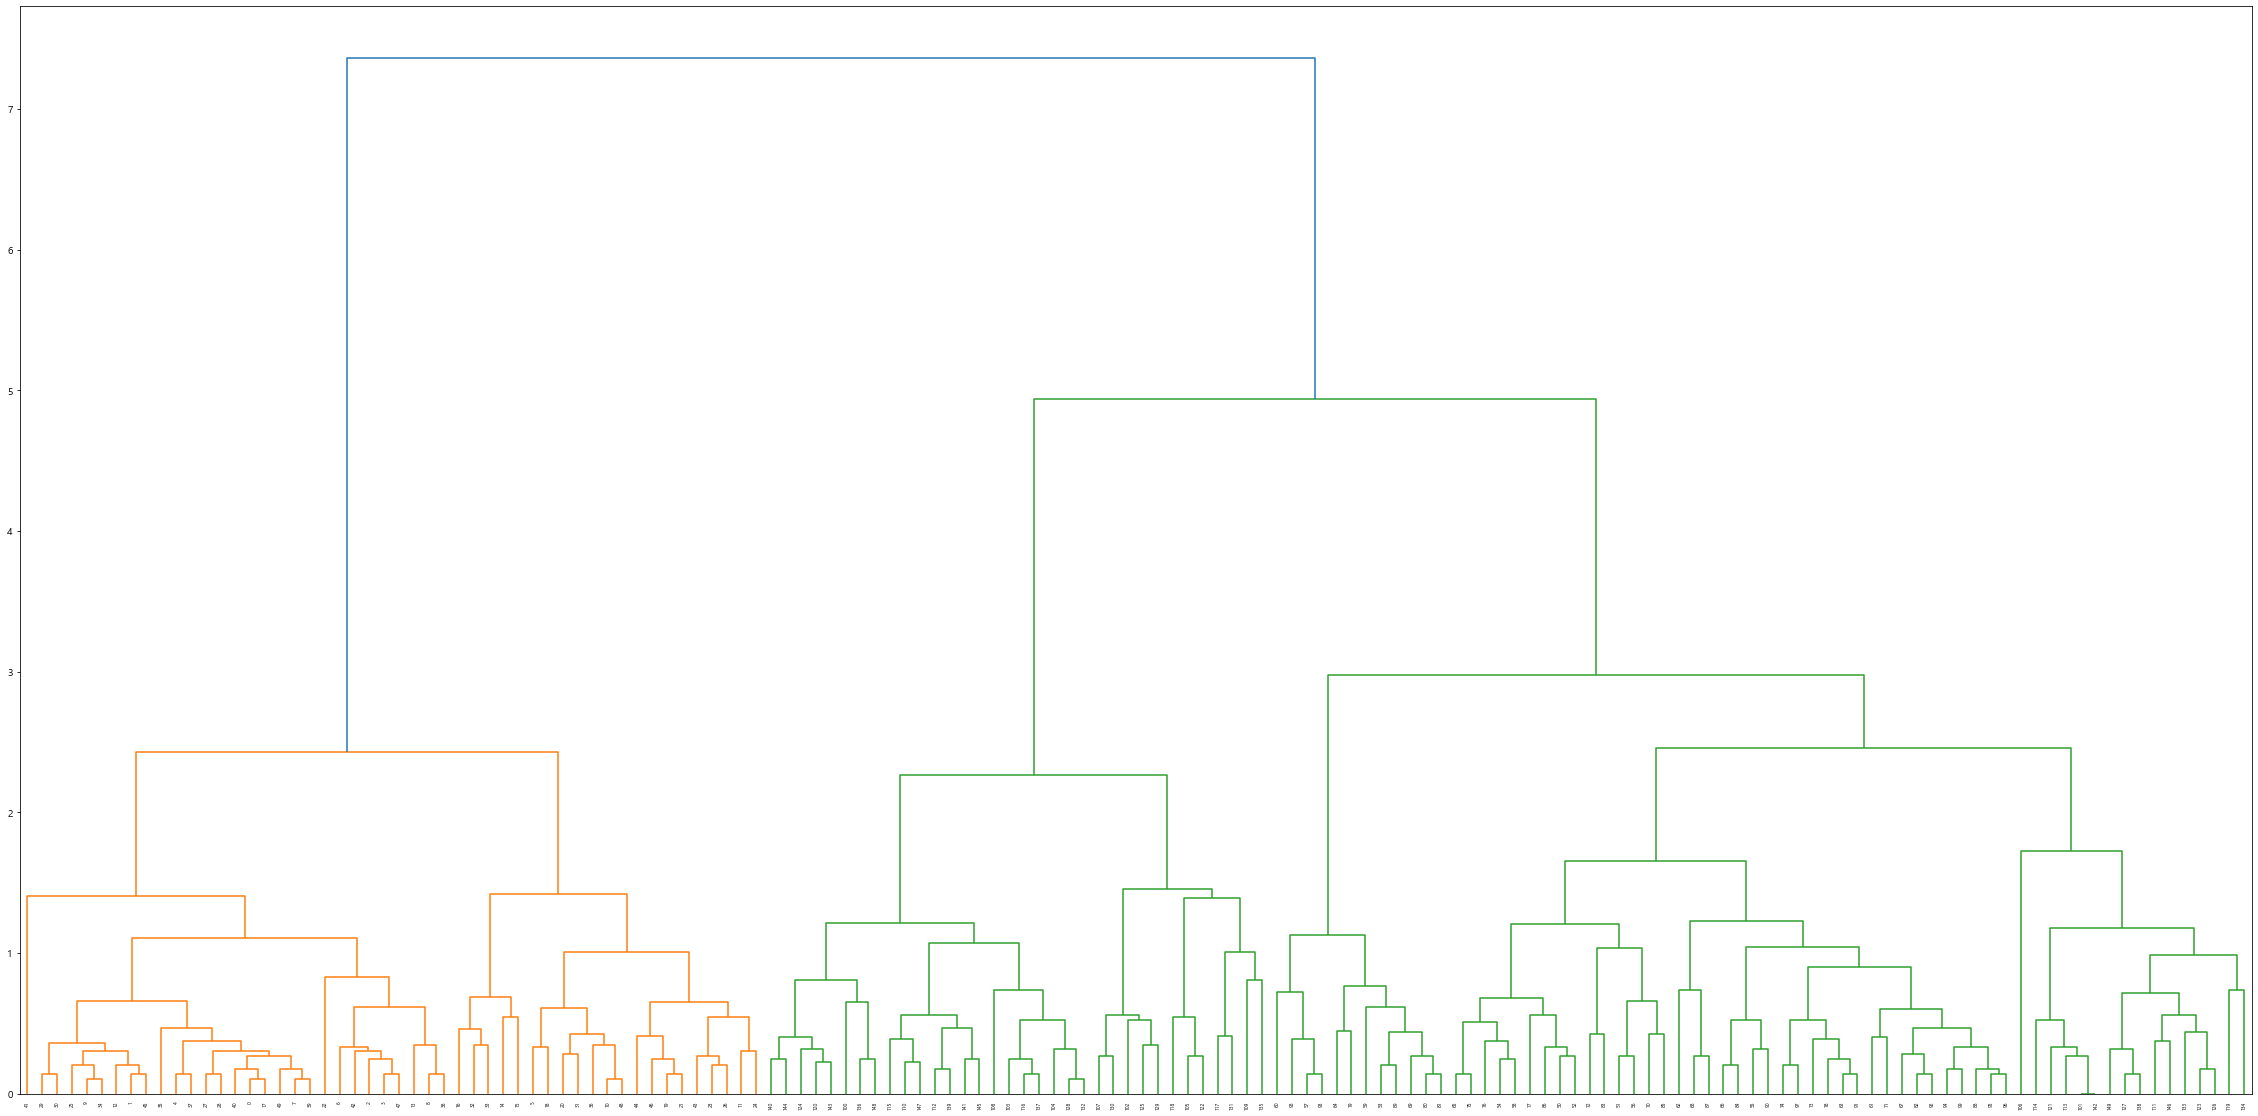

Predicted   setosa  versicolor  virginica  All
True                                          
setosa           0           0         50   50
versicolor       0          50          0   50
virginica       34          16          0   50
All             34          66         50  150


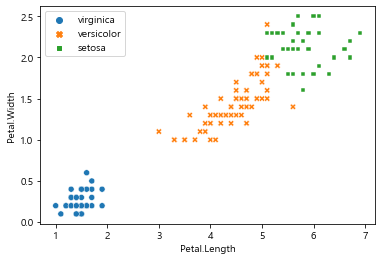

In [11]:
# iris 데이터 로드
import statsmodels.api as sm
iris = sm.datasets.get_rdataset("iris", package="datasets")
iris_df = iris.data
iris_df
# 레이블 인코딩(setosa:0 ~ virginica:2)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(iris_df.Species)
iris_df.Species = le.transform(iris_df.Species)
iris_df.Species
# Scikit-learn 패키지 사용
from sklearn.cluster import AgglomerativeClustering
#linkage = ['complete', 'average', 'ward'] # Centroid, Median은 오류 발생
linkage = ['single', 'complete']
for idx, i in enumerate(linkage):
 plt.figure(idx)
 hier = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage=i)
 # 'petal length'와 'petal width' column을 사용
 hier.fit(iris_df.iloc[:, 2:4])
 plt.scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3], c=hier.labels_)
 plt.title('Clustering : ' + i)
 plt.xlabel('petal length')
 plt.ylabel('petal width')
plt.show() 
# 계층적 군집 실행
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
clustering = linkage(iris_df, method='complete')
plt.figure(figsize=(40,20))
dendrogram(clustering)# 덴드로그램으로 표현
plt.show()
from scipy.cluster.hierarchy import fcluster
# clustering : linkage()명령을 수행한 데이터. 
predict = fcluster(clustering, 4, criterion='distance') 
predict
# 클러스터링 할당 번호 재조정([1,3,2] -> [2,0,1])
import numpy as np
adjusted_pred = np.choose((predict-1), [2, 0, 1]).astype(np.int64)
adjusted_pred
# 교차분류표 출력
import pandas as pd
# 0 -> 'setosa', 1 -> 'versicolor', 2 -> 'virginica'로 변환
pred_name = le.inverse_transform(adjusted_pred) 
origin_name = le.inverse_transform(iris_df.Species.values)
ct = pd.crosstab(origin_name, pred_name, rownames=["True"], colnames=["Predicted"], 
 margins=True)
print(ct)
import seaborn as sns
ax = sns.scatterplot(x="Petal.Length", y="Petal.Width", hue=le.inverse_transform(adjusted_pred), 
 style=le.inverse_transform(adjusted_pred), data=iris_df)

In [12]:
predict


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3], dtype=int32)

In [13]:
adjusted_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [14]:
adjusted_pred = np.choose((predict-1), [0, 2, 1]).astype(np.int64)
adjusted_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

[0 0 1 2 0 2 1 2 2 2 0 0 1 2 0 2 0 0 2 0 0 1 1 2 1 0 2 0 0 2 1 1 1 2 2 0 2
 0 0 1 2 2 0 1 2 1 1 2 1 2 2 1 2 2 0 2 2 1 0 0 2 0 1 0 2 2 1 2 1 0 0 1 2 0
 1 0 1 1 2 0 0 2 0 2 0 0 0 2 0 2 0 0 2 1 2 0 1 1 2 0]
[0 0 1 2 0 2 1 2 2 2 0 0 1 2 0 2 0 0 2 0 0 1 1 2 1 0 2 0 0 2 1 1 1 2 2 0 2
 0 0 1 2 2 0 1 2 1 1 2 1 2 2 1 2 2 0 2 2 1 0 0 2 0 1 0 2 2 1 2 1 0 0 1 2 0
 1 0 1 1 2 0 0 2 0 2 0 0 0 2 0 2 0 0 2 1 2 0 1 1 2 0]


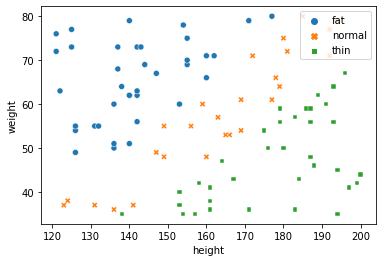

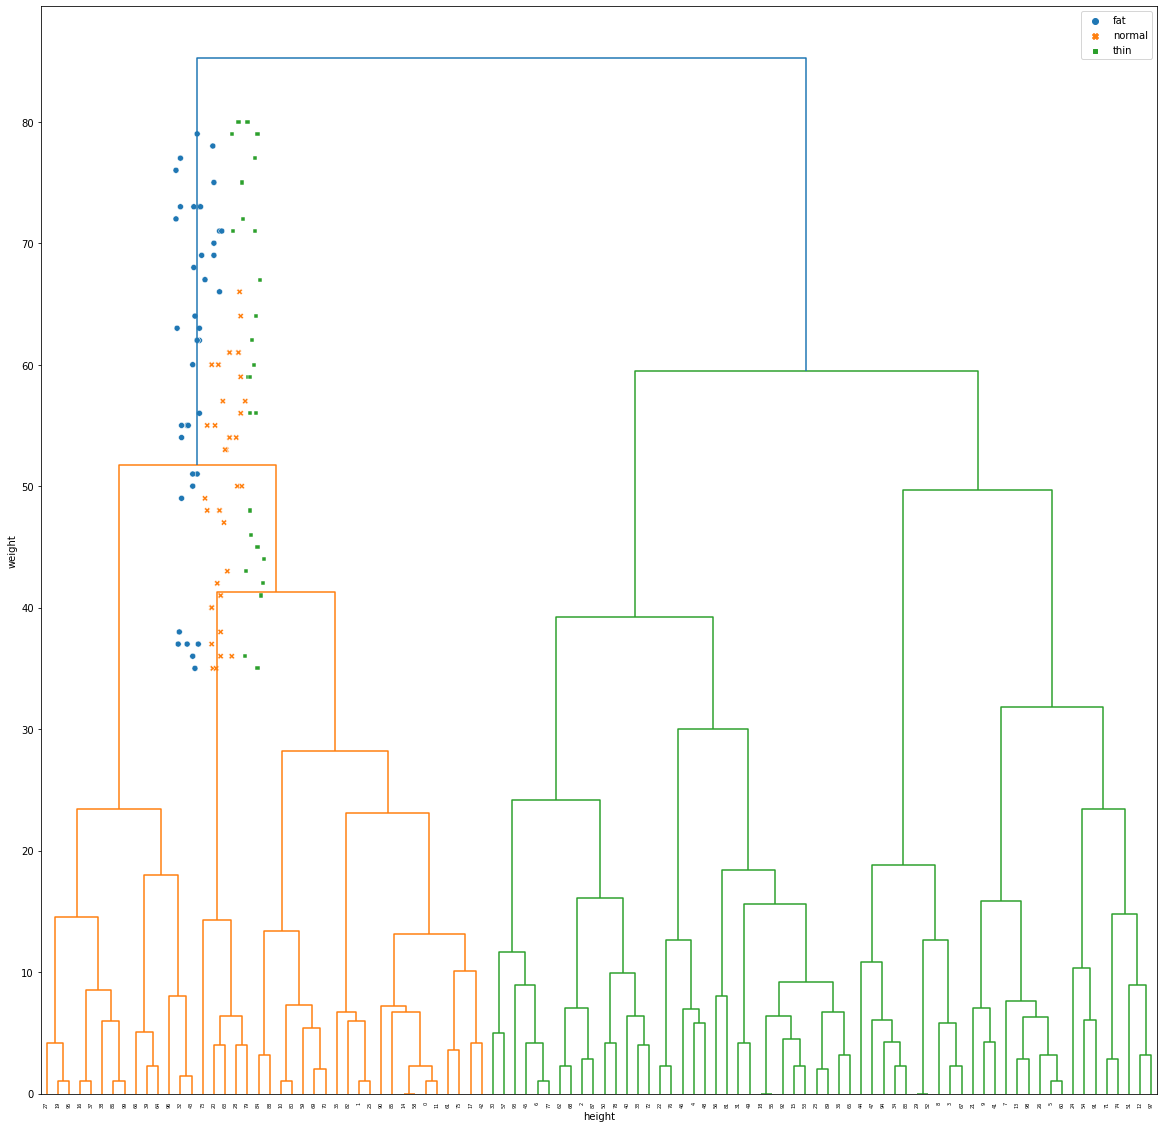

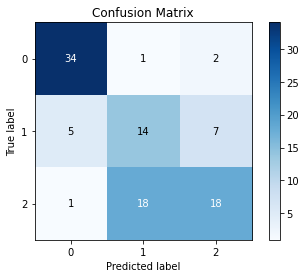

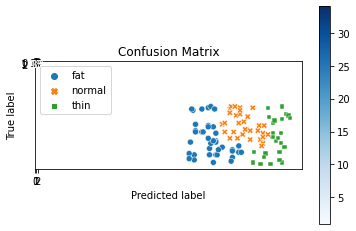

In [1]:

import pandas as pd

# 키와 몸무게 데이터 읽어 들이기 --- (※1)
data = pd.read_csv("./titanic/bmi.csv")

data = data.iloc[:100, :] # 데이터를 100개로 수정
l_data = data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['label'])
data['label'] = le.transform(data['label'])
data['label']
le.classes_

target=data['label']
data = data.drop(['label'], axis = 1)
data.shape

import seaborn as sns

ax = sns.scatterplot(x="height", y="weight",
                     hue=le.inverse_transform(target),
                     style=le.inverse_transform(target),
                     data=data)

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

cluster_complete = linkage(data, method='complete', metric='euclidean')

plt.figure(figsize=(20, 20))
dn = dendrogram(cluster_complete)

from scipy.cluster.hierarchy import fcluster

predict = fcluster(cluster_complete,55, criterion='distance')
predict

print(target.ravel())

import numpy as np

adjusted_pred = np.choose((predict-1), [0, 1, 2]).astype(np.int64)
adjusted_pred

import seaborn as sns

ax = sns.scatterplot(x="height", y="weight",
                     hue=le.inverse_transform(adjusted_pred),
                     style=le.inverse_transform(adjusted_pred),
                     data=data)

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(target, adjusted_pred)

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
pred = cluster.fit_predict(data)

import numpy as np

adjusted_pred = np.choose((pred), [0, 2, 1]).astype(np.int64)
adjusted_pred

print(target.ravel())

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(target, adjusted_pred)

import seaborn as sns

ax = sns.scatterplot(x="height", y="weight",
                     hue=le.inverse_transform(adjusted_pred),
                     style=le.inverse_transform(adjusted_pred),
                     data=data)
